In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression #logistics regression
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
x=pd.read_csv('column_2C_weka.csv')

In [4]:
x.head()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal

In [6]:
#Import labelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
#Converting string labels into numbers.
cl=le.fit_transform(x['class'])
print(cl)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
#split data in x and y
a=x.drop('class',axis=1)
b=x['class']

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=0)

## KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=7)  
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [16]:
y_pred = classifier.predict(xtest)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(ytest, y_pred))  
print(classification_report(ytest, y_pred)) 
print(accuracy_score(ytest, y_pred))

[[46  8]
 [ 6 18]]
              precision    recall  f1-score   support

    Abnormal       0.88      0.85      0.87        54
      Normal       0.69      0.75      0.72        24

   micro avg       0.82      0.82      0.82        78
   macro avg       0.79      0.80      0.79        78
weighted avg       0.83      0.82      0.82        78

0.8205128205128205


In [22]:
# cross validation
from sklearn.model_selection import cross_val_score
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

#perform 10 fold cross validation
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,xtrain,ytrain,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

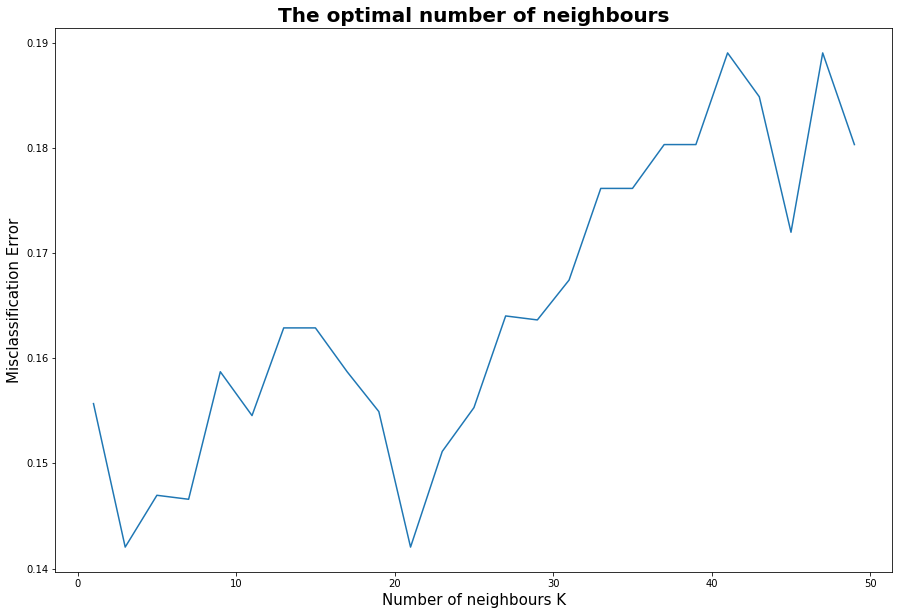

In [23]:
MSE = [1-c for c in cv_scores]
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(k_list,MSE)
plt.title('The optimal number of neighbours',fontsize=20,fontweight='bold')
plt.xlabel('Number of neighbours K', fontsize=15)
plt.ylabel('Misclassification Error',fontsize=15)
plt.show()

In [33]:
best_k=k_list[(MSE.index(min(MSE)))]
best_k

3

In [35]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [36]:
y_pred = classifier.predict(xtest)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(ytest, y_pred))  
print(classification_report(ytest, y_pred)) 
print(accuracy_score(ytest, y_pred))

[[48  6]
 [ 9 15]]
              precision    recall  f1-score   support

    Abnormal       0.84      0.89      0.86        54
      Normal       0.71      0.62      0.67        24

   micro avg       0.81      0.81      0.81        78
   macro avg       0.78      0.76      0.77        78
weighted avg       0.80      0.81      0.80        78

0.8076923076923077


## Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()  
classifier.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
y_pred = classifier.predict(xtest)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(ytest, y_pred))  
print(classification_report(ytest, y_pred)) 
print(accuracy_score(ytest, y_pred))

[[48  6]
 [ 9 15]]
              precision    recall  f1-score   support

    Abnormal       0.84      0.89      0.86        54
      Normal       0.71      0.62      0.67        24

   micro avg       0.81      0.81      0.81        78
   macro avg       0.78      0.76      0.77        78
weighted avg       0.80      0.81      0.80        78

0.8076923076923077


## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
y_pred = clf.predict(xtest)

In [49]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

Accuracy: 0.8076923076923077


## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
clf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
y_pred=clf.predict(xtest)

In [60]:
from sklearn import metrics
# Model accuracy how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest,y_pred))

Accuracy: 0.8076923076923077
